In [1]:
import matplotlib.pyplot as plt
from time import time
from simfunctions import *

# Homodimerization

$$ \emptyset \xrightarrow{k_1} mX_1 $$
$$ X_1 + X_1 \xrightarrow{k_2} X_2 $$
$$ X_1 \xrightarrow{k_3} \emptyset, \quad X_2 \xrightarrow{k_3} \emptyset$$

with parameter $k_1 = 1000, k_2 = 100, k_3 = 10$.

In [2]:
def rate1(X):
    return 1

def rate2(X):
    rate = X[0]*(X[0]-1)  # 0.5(X^2 - X) 
    if rate > 0:
        return rate
    else:
        return 0

def rate3(X):
    rate = X[0]
    if rate > 0:
        return rate
    else:
        return 0
    
def rate4(X):
    rate = X[1]
    if rate > 0:
        return rate
    else:
        return 0
    
# Model Parameters
drift = [rate1, rate2, rate3, rate4]
S_matrix = np.array([[1, 0], [-2, 1], [-1, 0], [0, -1]])  # Stoichiometry matrix
c = np.array([5, 2.5, 0.5, 0.5])  # Reaction rates
X0 = np.array([2, 0])  # Initial state
T = 1  # Total time


## SSA

In [3]:
n_runs = 1000
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_ssa = next_reaction(drift, S_matrix, c, X0, T)
    runs.append(X)
    
x_ssa = np.mean(np.array(runs), axis=0)


0.0 % simulations completed
10.0 % simulations completed


C:\Users\birik\github\SOGA4SSA\src\simfunctions.py:25: RuntimeWarning: divide by zero encountered in divide
  rand_vars = np.random.exponential(1 / a)


20.0 % simulations completed
30.0 % simulations completed
40.0 % simulations completed
50.0 % simulations completed
60.0 % simulations completed
70.0 % simulations completed
80.0 % simulations completed
90.0 % simulations completed


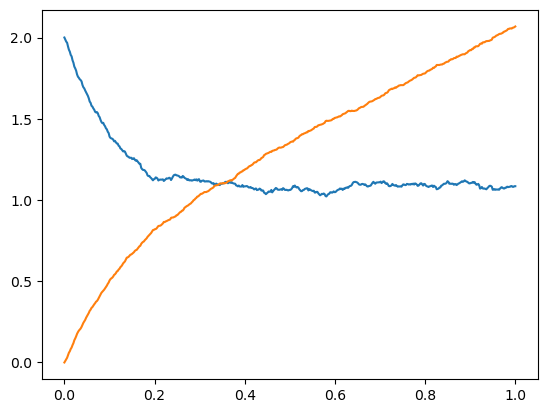

In [4]:
plt.plot(t_ssa, x_ssa)

## Tau-leaping

In [29]:
tau = 0.005  # Leap size

n_runs = 100
runs = []

for run in range(n_runs):
    if 100*run/n_runs % 10 == 0:
        print(100*run/n_runs, '% simulations completed')
    X = None
    while X is None:
        X, t_tau = tau_leaping(drift, S_matrix, c, X0, T, tau)
    runs.append(X)
    
print('Number of steps: ', len(X))

0.0 % simulations completed
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.0

[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.    

[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.

[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.025  0.005  0.0075]
[0.025  0.025  0.005  0.0075]
[0.025  0.025  0.005  0.0075]
[0.025  0.025  0.005  0.0075]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.0

[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.

[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.025  0.005  0.0025]
[0.025  0.075  0.0075 0.0025]
[0.025  0.075  0.0075 0.0025]
[0.025  0.075  0.0075 0.0025]
[0.025  0.075  0.0075 0.0025]
[0.025  0.075  0.0075 0.0025]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.     0.0025 0.005 ]
[0.025  0.

[0.025  0.025  0.005  0.0075]
[0.025  0.025  0.005  0.0075]
[0.025  0.025  0.005  0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.     0.0025 0.0075]
[0.025  0.025  0.005  0.0075]
[0.025  0.025  0.005  0.0075]
[0.025  0.025  0.005  0.0075]
[0.025  0.025  0.005  0.0075]
[0.025  0.

[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025  0.     0.     0.0025]
[0.025  

[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     

[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.

[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.

[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025  0.     0.     0.0075]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025 0.    0.    0.005]
[0.025  0.     0.     0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 

[0.025 0.    0.    0.   ]
[0.025 0.    0.    0.   ]
[0.025 0.    0.    0.   ]
[0.025 0.    0.    0.   ]
[0.025 0.    0.    0.   ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025  0.     0.0025 0.    ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025 0.025 0.005 0.   ]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.     0.     0.0025]
[0.025  0.  

[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.     0.0025 0.0025]
[0.025  0.

In [30]:
std_tau = np.std(runs, axis=0)[:,0]

In [33]:
np.mean(runs, axis=0)[:,0]**2 + np.var(runs, axis=0)[:,0]

array([4.  , 3.81, 3.87, 3.8 , 3.61, 3.51, 3.56, 3.73, 3.68, 3.49, 3.39,
       3.43, 3.46, 3.52, 3.37, 3.24, 3.12, 3.28, 3.26, 3.12, 3.09, 3.07,
       2.91, 2.91, 2.75, 2.8 , 2.92, 2.59, 2.33, 2.43, 2.33, 2.33, 2.33,
       2.28, 2.35, 2.28, 2.33, 2.38, 2.41, 2.43, 2.42, 2.24, 2.39, 2.37,
       2.27, 2.27, 2.34, 2.27, 2.28, 2.42, 2.22, 2.31, 2.31, 2.48, 2.45,
       2.39, 2.45, 2.51, 2.38, 2.37, 2.34, 2.32, 2.43, 2.44, 2.27, 2.33,
       2.33, 2.25, 2.11, 2.05, 2.05, 1.94, 1.8 , 1.8 , 1.78, 1.89, 1.97,
       1.95, 1.97, 1.88, 1.96, 1.89, 1.73, 1.57, 1.65, 1.7 , 1.64, 1.7 ,
       1.73, 1.73, 1.65, 1.51, 1.53, 1.51, 1.49, 1.68, 1.68, 1.7 , 1.72,
       1.77, 1.57, 1.61, 1.68, 1.58, 1.6 , 1.92, 1.88, 1.69, 1.73, 1.6 ,
       1.65, 1.63, 1.63, 1.64, 1.54, 1.54, 1.55, 1.59, 1.59, 1.49, 1.51,
       1.4 , 1.44, 1.34, 1.35, 1.34, 1.42, 1.4 , 1.47, 1.65, 1.85, 1.72,
       1.76, 1.74, 1.78, 1.71, 1.72, 1.76, 1.61, 1.67, 1.63, 1.65, 1.63,
       1.6 , 1.49, 1.49, 1.6 , 1.61, 1.53, 1.57, 1.

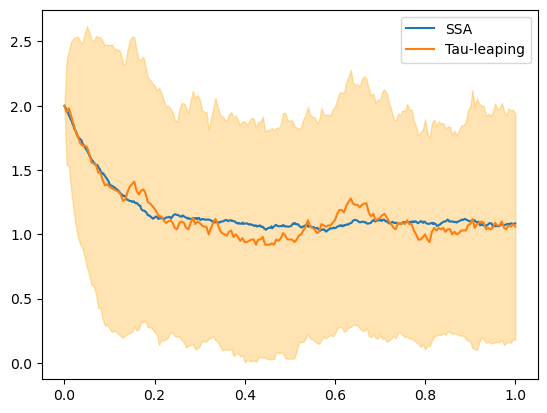

In [22]:
x_tau = np.mean(runs, axis=0)

plt.plot(t_ssa, x_ssa[:,0], label='SSA')
plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.fill_between(t_tau, x_tau[:,0]-std_tau, x_tau[:,0]+std_tau ,alpha=0.3, color='orange')
plt.legend()

## Mean-field

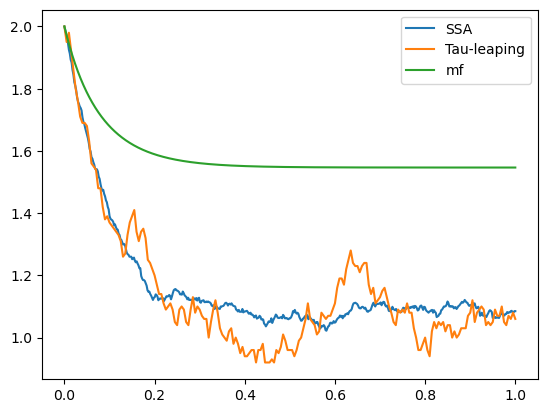

In [7]:

tmf = np.linspace(0,T, 5000)
Xmf = mean_field(drift,S_matrix,c,X0,tmf)

plt.plot(t_ssa, x_ssa[:,0], label='SSA')
plt.plot(t_tau, x_tau[:,0], label='Tau-leaping')
plt.plot(tmf, Xmf[:,0], label='mf')
plt.legend()


## SOGA 

In [25]:
from sogaPreprocessor import *
from producecfg import *
from libSOGA import *

compiledFile=compile2SOGA('../programs/SOGA/SSA/Homodimerization.soga')
cfg = produce_cfg(compiledFile)
start = time()
output_dist = start_SOGA(cfg)
end = time()

print('Computed in {}s'.format(np.round(end-start,3)))

It. [None]
rate1 0.0
rate2 0.0
rate3 0.0
rate4 0.0
It. [1]
rate1 0.025
rate2 0.05
rate3 0.005
rate4 0.0
It. [2]
rate1 0.025
rate2 0.048955000000000005
rate3 0.0048
rate4 0.000125
It. [3]
rate1 0.025
rate2 0.048100757965885386
rate3 0.004600424961164591
rate4 0.0002488007734577783
It. [4]
rate1 0.025
rate2 0.047326508820982466
rate3 0.004388032889151134
rate4 0.00037864127729433884
It. [5]
rate1 0.025
rate2 0.04664894047443534
rate3 0.0041609936704814525
rate4 0.0005154548379612253
It. [6]
rate1 0.025
rate2 0.046110137066313464
rate3 0.0039200984193711284
rate4 0.0006588114114779417
It. [7]
rate1 0.025
rate2 0.04575392944220336
rate3 0.0036665123119465986
rate4 0.0008080960950095166
It. [8]
rate1 0.025
rate2 0.04562139046527158
rate3 0.0034012524284487795
rate4 0.0009627773936099839
It. [9]
rate1 0.025
rate2 0.045750561323830555
rate3 0.0031250064396389707
rate4 0.0011224958795578296
It. [10]
rate1 0.025
rate2 0.04617775178523655
rate3 0.0028380450610993513
rate4 0.0012871052399358338
I

It. [120]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [121]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [122]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [123]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [124]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [125]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [126]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [127]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [128]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [129]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [130]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [131]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [132]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [133]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [134]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [135]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [136]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [137]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [138]
rate1 0.025
rate2 nan
rate3 nan
rate4 nan
It. [139]
ra

In [26]:
t = len(t_tau)

x1 = np.zeros(t)
x2 = np.zeros(t)
std1 = np.zeros(t)
std2 = np.zeros(t)

for i in range(t):
    idx1 = output_dist.var_list.index('X1[{}]'.format(i))
    idx2 = output_dist.var_list.index('X2[{}]'.format(i))
    x1[i] = output_dist.gm.mean()[idx1]
    std1[i] = np.sqrt(output_dist.gm.cov()[idx1,idx1])
    x2[i] = output_dist.gm.mean()[idx2]
    std2[i] = np.sqrt(output_dist.gm.cov()[idx2,idx2])

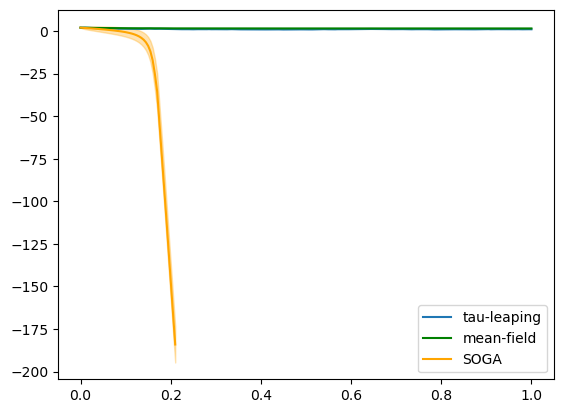

In [27]:
plt.plot(t_tau, x_tau[:,0], label='tau-leaping')
plt.plot(tmf, Xmf[:,0], label='mean-field', color='green')
plt.plot(t_tau, x1, label='SOGA', color='orange')
plt.fill_between(t_tau, x1-std1, x1+std1 ,alpha=0.3, color='orange')
plt.legend()

In [11]:
pois_mu = 325.4938460168556 
pois_sigma = 2199.1139286691114 
supp = 10

poisson_var(pois_mu, pois_sigma, supp, 'mom1')

([1.0], [nan], [nan])

In [23]:
std_tau

array([0.        , 0.40926764, 0.44676616, 0.57758116, 0.6636264 ,
       0.73484692, 0.77614432, 0.79113842, 0.79617837, 0.86827415,
       0.93680307, 0.94503968, 0.95205042, 0.95262794, 1.00419122,
       1.05337553, 1.05337553, 1.07870292, 1.09343495, 1.08531102,
       1.10140819, 1.11821286, 1.09886305, 1.09745159, 1.10503394,
       1.1017713 , 1.06414285, 1.05692952, 1.10503394, 1.13714555,
       1.14799826, 1.12334322, 1.08830143, 1.04589674, 1.0219589 ,
       1.03319892, 0.98873657, 0.97339612, 0.96041658, 0.95477746,
       0.9591663 , 0.94926287, 1.00019998, 0.9593748 , 0.93696318,
       0.90658701, 0.9       , 0.87057452, 0.86133617, 0.84113019,
       0.8357033 , 0.8842511 , 0.92195445, 0.9283857 , 0.9313968 ,
       0.90465463, 0.94968416, 0.98645831, 0.97652445, 0.98488578,
       0.96015624, 0.89727365, 0.89241246, 0.89241246, 0.81240384,
       0.85293611, 0.8842511 , 0.94106323, 0.91301698, 0.89949986,
       0.91098847, 0.89442719, 0.88876319, 0.9162969 , 0.92146

In [24]:
std1

array([ 0.        ,  0.36055513,  0.51599724,  0.64382892,  0.75831839,
        0.86445664,  0.96467658,  1.06039367,  1.1525382 ,  1.2417851 ,
        1.32866857,  1.41364569,  1.49713501,  1.57954218,  1.6612787 ,
        1.74277733,  1.82450623,  1.90698357,  1.99079392,  2.07660792,
        2.16520704,  2.25751573,  2.35464431,  2.45794775,  2.56910778,
        2.69025073,  2.82412116,  2.97434519,  3.14584399,  3.34550883,
        3.58335484,  3.87460243,  4.24367857,  4.73245576,  5.41777399,
        6.43824142,  7.91476261,  9.53865238, 10.98805817, 10.9760386 ,
       10.97027323, 10.967259  , 10.96067326, 10.95404975, 10.94708907,
       10.93964255, 10.9316355 ,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,         nan,
               nan,         nan,         nan,         nan,      